In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
import sys, getopt
import csv
import pickle

pd.set_option('display.max_rows', 500)

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline  
import seaborn as sns
sns.set_style("darkgrid")

import umap
from sklearn.decomposition import TruncatedSVD as tsvd

def nearZeroVarDropAuto(df,thresh=0.99):
    vVal=df.var(axis=0).values
    cs=pd.Series(vVal).sort_values(ascending=False).cumsum()
    remove=cs[cs>cs.values[-1]*thresh].index.values
    return df.drop(df.columns[remove],axis=1)

In [2]:
%run SodaKick_download_functions.ipynb

In [3]:
df_outfield=pd.read_hdf('/Users/federico comitani/GitHub/sodakick/data/SA2021_Outfield.hdf',key='pl')
df_team=pd.read_hdf('/Users/federico comitani/GitHub/sodakick/data/SA2021_Team.hdf',key='pl')
df_vs=pd.read_hdf('/Users/federico comitani/GitHub/sodakick/data/SA2021_Vs.hdf',key='pl')
df_keeper=pd.read_hdf('/Users/federico comitani/GitHub/sodakick/data/SA2021_keeper.hdf',key='pl')
df_fix=pd.read_hdf('/Users/federico comitani/GitHub/sodakick/data/SA2021_fix.hdf',key='pl')

In [20]:
with open(r'/Users/federico comitani/GitHub/sodakick/data/allplayers_weighted.pkl', 'rb') as pk:
    allpl_weighted=pickle.load(pk)
    
with open(r'/Users/federico comitani/GitHub/sodakick/data/allplayers_weighted_tsvd.pkl', 'rb') as pk:
    allpl_weighted_ts=pickle.load(pk)

In [8]:
import umap
sel=allpl_weighted[3]
sel_cut=sel
#sel_cut=sel[[x for x in allpl_weighted[3].columns if x not in ['minutes','birth_year']]][sel['keeper']==0]
mapping=umap.UMAP(metric='cosine', n_components=2, min_dist=0.0, spread=5, n_neighbors=int(np.sqrt(sel_cut.shape[0])), \
                                n_epochs=500, learning_rate=0.05, \
                                verbose=False, random_state=32)
mapping.fit(sel_cut.astype(float).values)
mh=pd.DataFrame(mapping.transform(sel_cut.values), index=sel_cut.index)
mh=(mh-mh.min())/(mh.max()-mh.min())

//miniconda3/lib/python3.7/site-packages/umap/umap_.py:1158: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


In [9]:
from scipy.stats import spearmanr

sp=[[],[]]
for c in sel_cut.columns:
    sp[0].append(spearmanr(sel_cut[c],mh[0])[0])
    sp[1].append(spearmanr(sel_cut[c],mh[1])[0])
    
sp=pd.DataFrame(sp,columns=sel_cut.columns).T
sp.sort_values(1,ascending=False)

,0,1
errors,0.510039,0.128312
xa_net,0.016776,0.106953
blocked_shots_saves,0.365947,0.104688
xg_net,-0.042548,0.102251
own_goals,0.272164,0.102234
birth_year,-0.261221,0.098521
pens_conceded,0.442395,0.091441
free_kick_goals_against,0.023866,0.074066
pens_missed,0.028099,0.072547
pens_saved,0.028295,0.070561


Text(0, 0.5, 'UMAP 2')

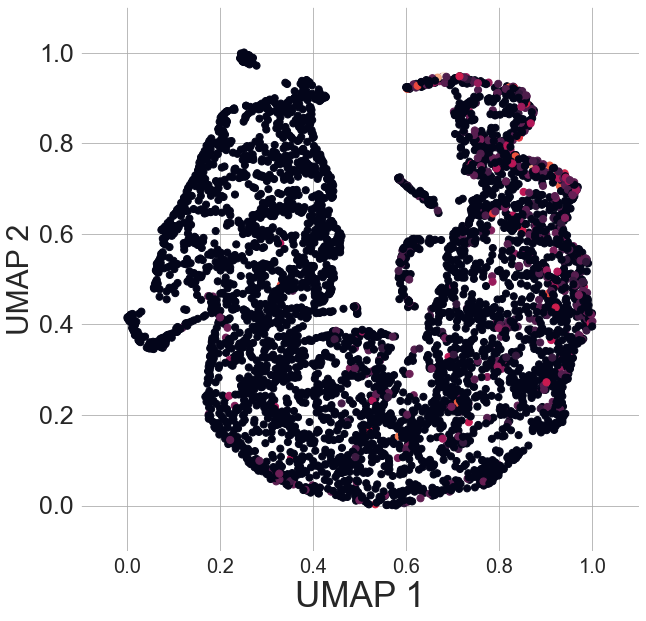

In [10]:
fig, ax = plt.subplots(1, 1,figsize=(10,10))
#plt.axis('off')
ax.set_facecolor('white')
plt.grid(color='#aaaaaa')


plt.scatter(mh[0],mh[1], s=50, c=sel_cut['own_goals'])

ax.tick_params(axis='y', which='major', labelsize=0)
ax.tick_params(axis='x', which='major', labelsize=0)


ax.set_xticks(np.linspace(0,1,6))
ax.set_xticklabels(['{:.1f}'.format(x) for x in np.linspace(0,1,6)])
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
plt.xlim((-.1,1.1))
plt.xlabel('UMAP 1', fontsize=35)



ax.set_yticks(np.linspace(0,1,6))
ax.set_yticklabels(['{:.1f}'.format(x) for x in np.linspace(0,1,6)])
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(25) 
    
plt.ylim((-.1,1.1))
plt.ylabel('UMAP 2', fontsize=30)

In [21]:
allpl_weighted[3]['x_coor']=mh[0]
allpl_weighted[3]['y_coor']=mh[1]

In [22]:
allpl_weighted[3].to_csv('/Users/federico comitani/GitHub/sodakick/data/all_pl_test1.csv')

# now build them

In [ ]:
import warnings
warnings.filterwarnings('ignore')

inputs=[]
outputs=[]
lineups=[]

exit=False
for i,series in enumerate(['SA2021','SA1920','BL2021','BL1920','LU2021','LU1920','PL2021','PL1920','LL2021','LL1920']):
    
    print(series)
    
    for match in df_fixs[i]['match_report'].values:

        try:

            inp, results, lineup = clean_report(match, players_year_dict[series[2:]])
            
            if inp.shape[0]<48:
                print(match)
                exit=True
                break
            
            inputs.append(inp.astype(float).values.flatten())
            outputs.append(results.astype(float).values.flatten())
            lineups.append(lineup.reset_index())
            
        except:

            pass
        
    if exit:
        break
        
    print(len(inputs))
    
inputs=np.array(inputs)
outputs=np.array(outputs)


with open(r'/Users/federico comitani/GitHub/sodakick/data/10leagues_weight_inp_a_210614.pkl', 'wb') as pk:
    pickle.dump(inputs,pk)

with open(r'/Users/federico comitani/GitHub/sodakick/data/10leagues_weight_out_a_210614.pkl', 'wb') as pk:
    pickle.dump(outputs,pk)
    
with open(r'/Users/federico comitani/GitHub/sodakick/data/10leagues_lineup_a_210614.pkl', 'wb') as pk:
    pickle.dump(lineups,pk)

SA2021
357
SA1920
737
BL2021
1024
BL1920
1330
LU2021
1689
LU1920
1968
PL2021
2315
PL1920


In [18]:
import warnings
warnings.filterwarnings('ignore')

inputs=[]
outputs=[]
lineups=[]

exit=False
for i,series in enumerate(['SA1819','SA1718','BL1819','BL1718','LU1819','LU1718','PL1819','PL1718','LL1819','LL1718']):
    
    print(series)
    
    for match in df_fixs[i]['match_report'].values:

        try:

            inp, results, lineup = clean_report(match, players_year_dict[series[2:]])
            
            if inp.shape[0]<48:
                print(match)
                exit=True
                break

            inputs.append(inp.astype(float).values.flatten())
            outputs.append(results.astype(float).values.flatten())
            lineups.append(lineup.reset_index())
            
        except:

            pass

    print(len(inputs))
    
inputs=np.array(inputs)
outputs=np.array(outputs)


with open(r'/Users/federico comitani/GitHub/sodakick/data/10leagues_weight_inp_b_210614.pkl', 'wb') as pk:
    pickle.dump(inputs,pk)

with open(r'/Users/federico comitani/GitHub/sodakick/data/10leagues_weight_out_b_210614.pkl', 'wb') as pk:
    pickle.dump(outputs,pk)
    
with open(r'/Users/federico comitani/GitHub/sodakick/data/10leagues_lineup_b_210614.pkl', 'wb') as pk:
    pickle.dump(lineups,pk)

SA1819
357
SA1718
737
BL1819
1024
BL1718
1330
LU1819
1688
LU1718
1967
PL1819
2314
PL1718
2692
LL1819
3044
LL1718
3421


# trying and merging them

In [20]:
with open(r'/Users/federico comitani/GitHub/sodakick/data/10leagues_weight_inp_a.pkl', 'rb') as pk:
    inputs=pickle.load(pk)

with open(r'/Users/federico comitani/GitHub/sodakick/data/10leagues_weight_out_a.pkl', 'rb') as pk:
    outputs=pickle.load(pk)
    
with open(r'/Users/federico comitani/GitHub/sodakick/data/10leagues_weight_inp_b.pkl', 'rb') as pk:
    inputs2=pickle.load(pk)

with open(r'/Users/federico comitani/GitHub/sodakick/data/10leagues_weight_out_b.pkl', 'rb') as pk:
    outputs2=pickle.load(pk)

In [21]:
inputs=np.concatenate([inputs,inputs2])
outputs=np.concatenate([outputs,outputs2])

In [22]:
with open(r'/Users/federico comitani/GitHub/sodakick/data/10leagues_weight_inp.pkl', 'wb') as pk:
    pickle.dump(inputs,pk)

with open(r'/Users/federico comitani/GitHub/sodakick/data/10leagues_weight_out.pkl', 'wb') as pk:
    pickle.dump(outputs,pk)